# Programación para *Data Science*

Unidad 4: Librerías científicas en Python - SciPy
-------------------------------------------------

### Instrucciones de uso
A continuación se presentarán explicaciones y ejemplos de uso de la librería SciPy. Recordad que podéis ir ejecutando los ejemplos para obtener sus resultados.

### Ejemplo 1: Simulación de una apocalipsis Zombie

[Munz y otros en 2009](http://mysite.science.uottawa.ca/rsmith43/Zombies.pdf) definieron un modelo de invasión zombie mediante un sistema de ecuaciones diferenciales ordinarias:

* _dS/dt = P - B\*S\*Z - d\*S_
* _dZ/dt = B\*S\*Z + G\*R - A\*S\*Z_
* _dR/dt = d\*S + A\*S\*Z - G\*R_

Donde:

    S: el número de víctimas
    Z: el número de zombies
    R: el número de gente asesinada por los zombies
    P: el ratio de nacimientos
    d: la probabilidad de muerte natural
    B: la probabilidad de propagación de la enfermedad zombie (personas vivas y sanas)
    G: la probabilidad de que una persona muerta vuelva a la vida como zombie
    A: la probabilidad de que un zombie sea aniquilado completamente

Scipy puede resolver sistemas de primer orden de ecuaciones diferenciales de forma sencilla. Nos centraremos en resolver la expresión:
_dy/dt = f(y, t)_ donde _y = [S, Z, R]_.


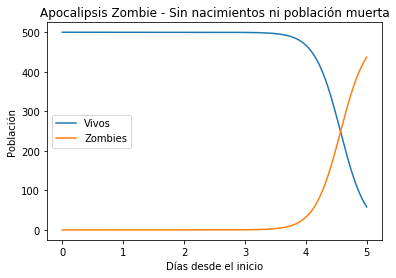

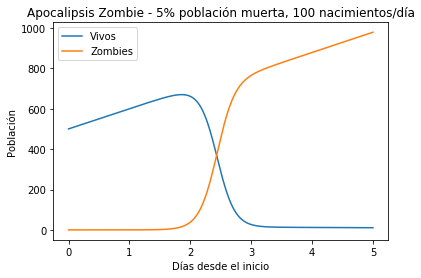

In [1]:
%matplotlib inline

# Fuente código: http://wiki.scipy.org/Cookbook/Zombie_Apocalypse_ODEINT

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

P = 0       # Ratio de nacimientos
d = 0.0001  # Porcentaje de muertes naturales (por día)
B = 0.0095  # Porcentaje de transmisión  (por día)
G = 0.0001  # Porcentaje de resurrecciones (por día)
A = 0.0001  # Porcentaje de destrucción  (por día)

# resuelve el sistema dy/dt = f(y, t)
def f(y, t):
    Si = y[0]
    Zi = y[1]
    Ri = y[2]
    # El modelo de Munz et al. 2009
    f0 = P - B*Si*Zi - d*Si
    f1 = B*Si*Zi + G*Ri - A*Si*Zi
    f2 = d*Si + A*Si*Zi - G*Ri
    return [f0, f1, f2]

# Condiciones iniciales
S0 = 500.               # población inicial
Z0 = 0                  # población inicial zombie
R0 = 0                  # población inicial muerta
y0 = [S0, Z0, R0]       # condiciones iniciales expresadas como un vector
t  = np.linspace(0, 5., 1000)   # vector de tiempo (pasos de simulación)

# resolvemos el sistema
soln = odeint(f, y0, t)
S = soln[:, 0]
Z = soln[:, 1]
R = soln[:, 2]

# Representamos los resultados
plt.figure()
plt.plot(t, S, label='Vivos')
plt.plot(t, Z, label='Zombies')
plt.xlabel(u'Días desde el inicio')
plt.ylabel(u'Población')
plt.title(u'Apocalipsis Zombie - Sin nacimientos ni población muerta')
plt.legend(loc=0)

# cambiamos las condiciones iniciales
R0 = 0.05*S0   # 5% de la población inicial está muerta
P  = 100       # 100 nuevos nacimientos por día
y0 = [S0, Z0, R0]

# volvemos a resolver el sistema
soln = odeint(f, y0, t)
S = soln[:, 0]
Z = soln[:, 1]
R = soln[:, 2]

plt.figure()
plt.plot(t, S, label='Vivos')
plt.plot(t, Z, label='Zombies')
plt.xlabel(u'Días desde el inicio')
plt.ylabel(u'Población')
plt.title(u'Apocalipsis Zombie - 5% población muerta, 100 nacimientos/día')
plt.legend(loc=0)
pass

### Ejemplo 2: Buscando cristales de proteínas

La criomicroscopía electrónica es una técnica de microscopía muy utilizada en biología estructural en la que la muestra que hay que estudiar se encuentra a temperaturas criogénicas. La siguiente imagen es una solución de la proteína GroEL (Fuente: Wikipedia - "Cryoem groel", Vossman):

<img src="files/media/Cryoem_groel.png">

Vamos a escribir un código que nos permita contar el número de cristales de GroEL en la imagen:

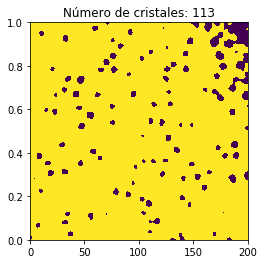

In [4]:
%matplotlib inline

import numpy as np
from scipy import ndimage
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

# Leemos la imagen original.
im = mpimg.imread('media/Cryoem_groel.png')
# Hacemos una copia que utilizaremos para manipular.
image = im.copy()

# Aplicamos un filtro gaussiano con tamaño de kernel 3.
im_g = ndimage.gaussian_filter(image, 3)
# Normalizamos.
im_norm = (im_g - im_g.min()) / (float(im_g.max()) - im_g.min())
im_norm[im_norm < 0.5] = 0
im_norm[im_norm >= 0.5] = 1

# Convertimos la imagen resultado para utilizar la función de etiquetado de scipy.
result = 255 - (im_norm * 255).astype(np.uint8)

# Identificamos el número de cristales y los mostramos.
plt.title(u"Número de cristales: %d" % ndimage.label(result)[1])
img = plt.imshow(np.asarray(im_norm), interpolation='nearest', extent=[0,200,0,1], aspect=200)
plt.show()

Este código no es perfecto puesto que no estamos teniendo en cuenta el artefacto de la esquina superior derecha, pero nos da una idea de cómo aplicar diferentes filtros utilizados en visión por computador en *scripts* de muy pocas líneas gracias a Scipy.